# Sheet 10

## a.

**Tree after up-sweep**

In [47]:
temp = a
uptree = [a]
while len(temp) != 1:
    temp = [temp[b] + temp[b+1] for b in range(0, len(temp), 2)]
    uptree.append(temp)

In [48]:
print(uptree)

[[4, 6, 1, 0, 1, 7, 3, 2], [10, 1, 8, 5], [11, 13], [24]]


**Tree after down-sweep**

In [ ]:
temp = uptree[0:(len(uptree)-1)]
downtree = [[0]]
while len(temp) != 0:
    parents = downtree[-1]
    children = temp.pop()
    new_children = []
    for j in range(len(parents)):
        new_children.append(parents[j])
        new_children.append(children[2*j] + parents[j])
    downtree.append(new_children)

hi
hi
hi


In [104]:
print(downtree)

[[0], [0, 11], [0, 10, 11, 19], [0, 4, 10, 11, 11, 12, 19, 22]]


## b.
**What is the time complexity of the parallel scan algorithm? Explain why.**

If the inner loop over the trees nodes at a given depth is parallelized and has time complexity $O(1)$, then the time complexity of the parallel scan algorithm is determined by the depth of the tree. For every step up the tree the number of nodes is halved, resulting in the following relation between depth $D$ and number of nodes $N$:
$$N = 2^{D} \Leftrightarrow D = \frac{\log N}{\log 2}$$
Which means that the time complexity of the algorithm is $O(\log N)$. 

## c.
**Reformulate the recurrence in eq. II such that it fits eq. I.**

We can write the recurrence as

$$ [\bar{A}^{i}, z_i] = \begin{cases} [1, z_0] \quad & i = 0, \\
                                      [\bar{A}^{i-1} \odot \bar{A}, (\bar{A} \otimes z_{i-1}) \oplus \bar{B} u_i], \quad & i > 0
\end{cases}$$

In the context of equation (1) this $y_i = \bar{A}^{i}$, $x_i = z_i$, $a_i = \bar{A}$, $b_i = \bar{B} u_i$

## d.

In [5]:
from jax.lax import associative_scan
from jax.random import randint, PRNGKey
import jax.numpy as np
import time
import os
from matplotlib import pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "0" ### SET THIS TO THE GPU ID YOU WANT TO USE (leave at 0 if you don't know)
os.environ["JAX_PLATFORM_NAME"] = "cuda"

We implement the two versions of the cumulative sum

In [6]:
def cumsum_sequential(sequence):
    result = []
    current = 0
    for j in range(len(sequence)):
        current += sequence[j]
        result.append(current)
    return(result)

def cumsum_associative_scan(sequence):
    def associative_binary_operator(element1, element2):
        return element1 + element2
    return associative_scan(associative_binary_operator, sequence)

We test them out

In [7]:
sequence = [1,2,4,5]
print(cumsum_sequential(sequence))
sequence = np.array([1, 2, 4, 5])
print(cumsum_associative_scan(sequence))

[1, 3, 7, 12]
[ 1  3  7 12]


**Record their runtimes for different lengths of input sequence and visualize the results.**

In [ ]:
lengths = [10, 100, 1000, 10000, 10**5]
times_autoregressive = []
times_associative_scan = []

for length in lengths:
    sequence = randint(PRNGKey(0), (length, ), 0, 10,)

    start = time.perf_counter()
    y1 = cumsum_sequential(sequence)
    end = time.perf_counter()
    times_autoregressive.append((end-start))

    cumsum_associative_scan(sequence).block_until_ready()              # Warm up

    start = time.perf_counter()
    y1 = cumsum_associative_scan(sequence).block_until_ready()         
    end = time.perf_counter()
    times_associative_scan.append((end-start))


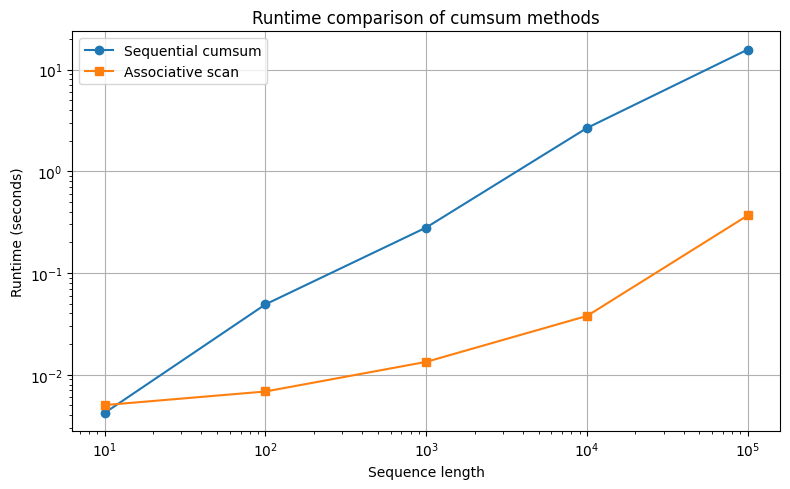

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(lengths, times_autoregressive, marker='o', label='Sequential cumsum')
plt.plot(lengths, times_associative_scan, marker='s', label='Associative scan')

plt.xlabel('Sequence length')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime comparison of cumsum methods')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Optional: makes it easier to see large jumps in input size
plt.yscale('log')  # Optional: useful if runtime varies a lot

plt.tight_layout()
plt.show()